### Graficos
dataset 1 : https://www.kaggle.com/datasets/saidaantonyan/iris-classifier-with-knn?select=Iris.csv
dataset 2 : https://www.kaggle.com/datasets/pabloa/wine-magazine?select=winemag-data_first150k.csv

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datagenerator import DataGenerator

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
datagen = DataGenerator()

In [6]:
df1 = pd.DataFrame()
dataset = datagen.download_dataset_zip("saidaantonyan/iris-classifier-with-knn") 
csv_dir =datagen.extract_zip_files(dataset)
df1 = datagen.create_csv(csv_dir)

Descargando dataset desde Kaggle...
Ruta al dataset: /home/codespace/.cache/kagglehub/datasets/saidaantonyan/iris-classifier-with-knn/versions/1
No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.
Leyendo /home/codespace/.cache/kagglehub/datasets/saidaantonyan/iris-classifier-with-knn/versions/1/Iris.csv...
Creando/actualizando 
cvs creado correctamente en 


In [7]:
df1.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [8]:
df2= datagen.leer_ruta("/workspaces/pad20252_1/src/clases_ad/static/csv/winemag-data_first150k.csv")
df2.head(2)

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,92


# graficos de barras

<Axes: xlabel='country'>

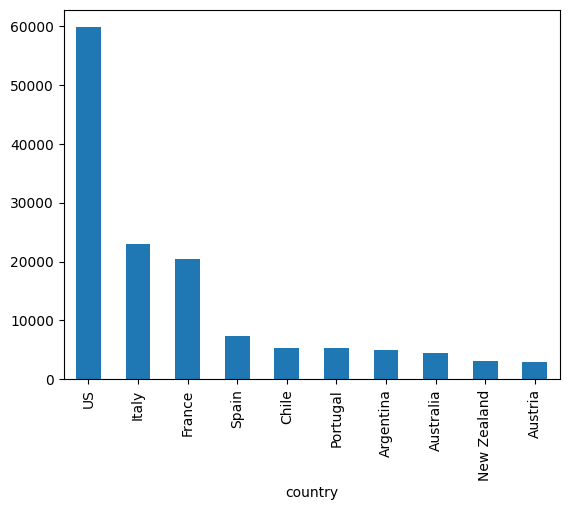

In [13]:
#df2["country"].value_counts().head(10).plot.bar()
df10= df2["country"].value_counts()
df10 = df10.head(10)
df10.plot.bar()

<Axes: xlabel='points'>

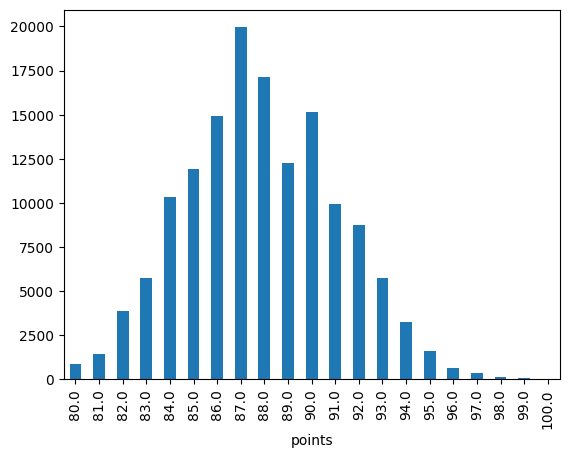

In [15]:
df2["points"].value_counts().sort_index().plot.bar()

<Axes: xlabel='price'>

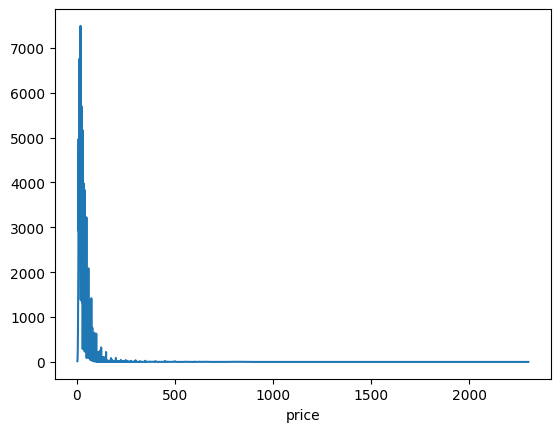

In [16]:
df2["price"].value_counts().sort_index().plot.line()

In [20]:
df2["price"]

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
144032     20.0
144033     27.0
144034     20.0
144035     52.0
144036     15.0
Name: price, Length: 144037, dtype: float64

<Axes: xlabel='price'>

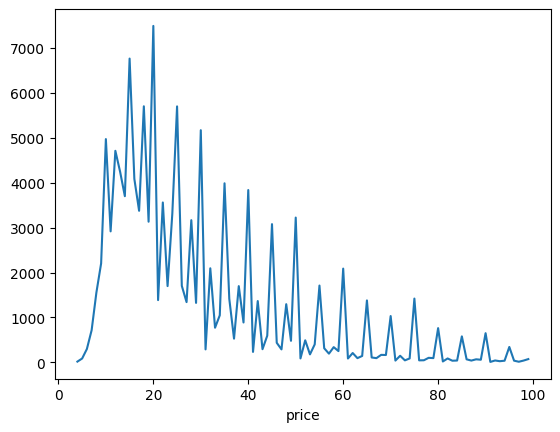

In [23]:
df2.query("price < 100").price.value_counts().sort_index().plot.line()

<Axes: xlabel='points'>

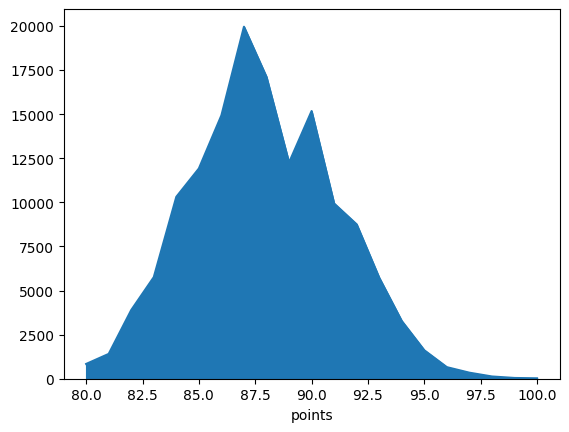

In [24]:
df2["points"].value_counts().sort_index().plot.area()

<Axes: xlabel='points', ylabel='price'>

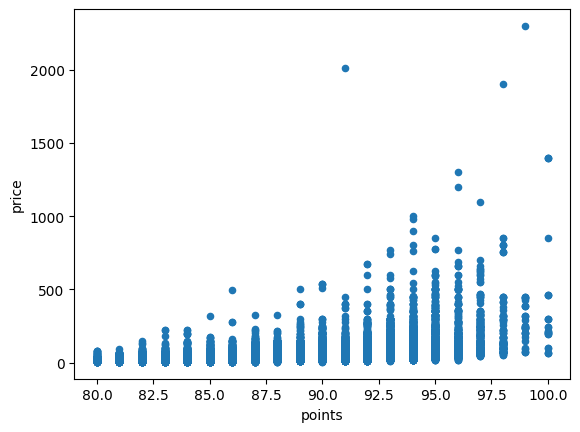

In [27]:
# x= puntos y= price
df2.plot.scatter(x = "points",y="price")

<Axes: xlabel='points'>

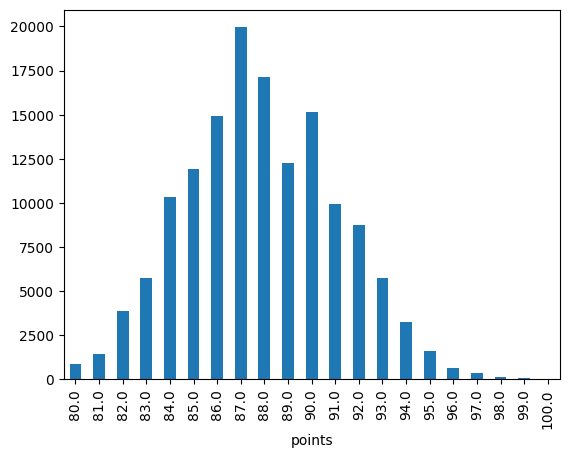

In [29]:
df2["points"].value_counts().sort_index().plot.bar()

<Axes: title={'center': 'Puntos de venta'}, xlabel='points'>

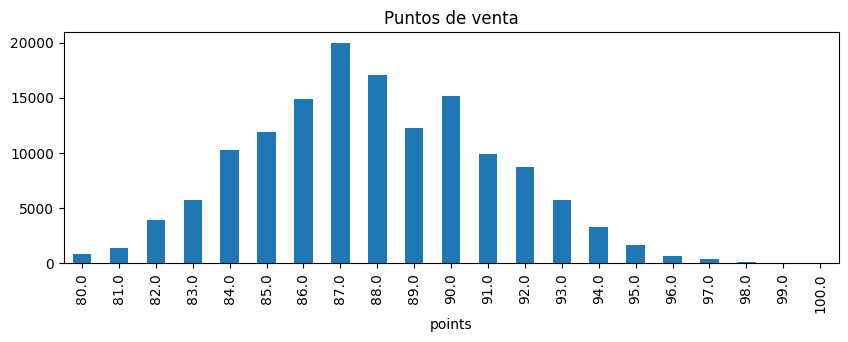

In [30]:
df2["points"].value_counts().sort_index().plot.bar(figsize=(10,3),fontsize=10,title="Puntos de venta")

# Seaborn

In [31]:
import seaborn as sns

<Axes: xlabel='count', ylabel='country'>

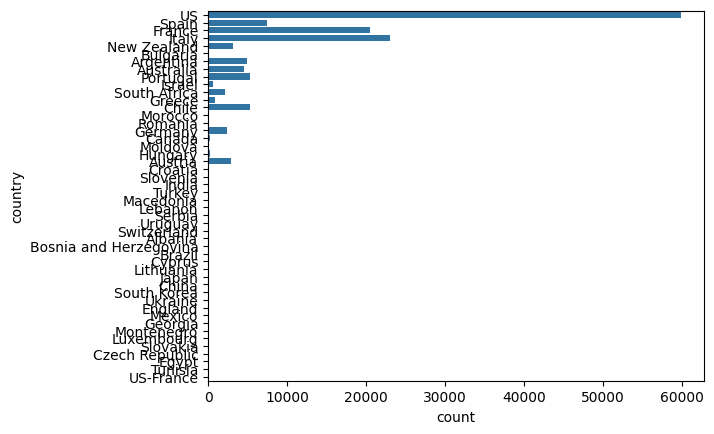

In [32]:
sns.countplot(df2["country"])

In [35]:
df2.country.value_counts().iloc[:5].index

Index(['US', 'Italy', 'France', 'Spain', 'Chile'], dtype='object', name='country')

<Axes: xlabel='count', ylabel='country'>

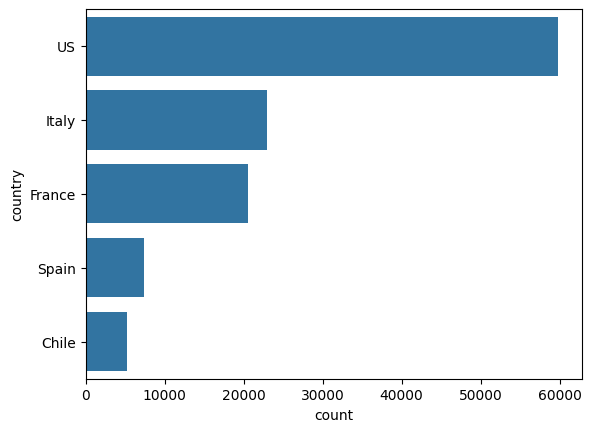

In [37]:
filtro = ['US', 'Italy', 'France', 'Spain', 'Chile']
#sns.countplot(df2["country"],order=df2.country.value_counts().iloc[:5].index)
sns.countplot(df2["country"],order=filtro)

<Axes: xlabel='price', ylabel='Density'>

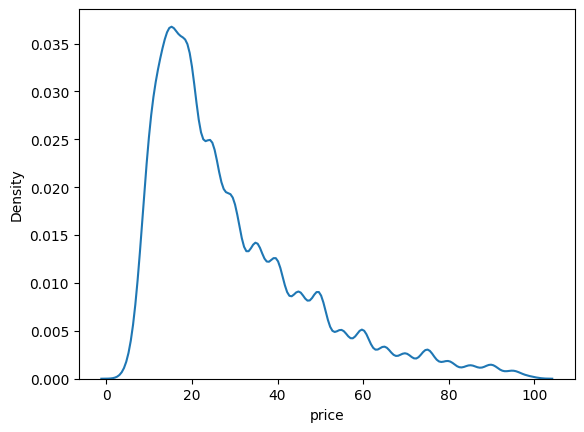

In [38]:
sns.kdeplot(df2.query("price < 100").price)

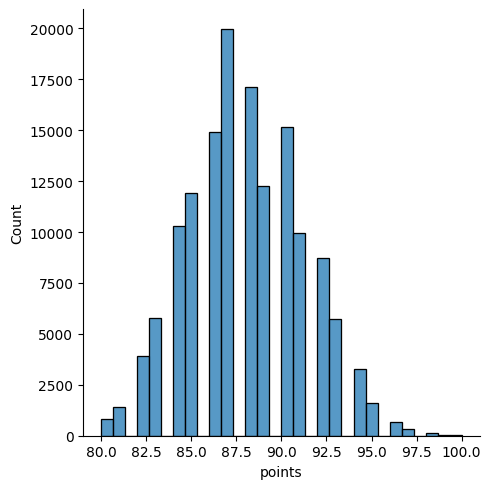

In [39]:
ax = sns.displot(df2["points"],bins=30,kde=False)

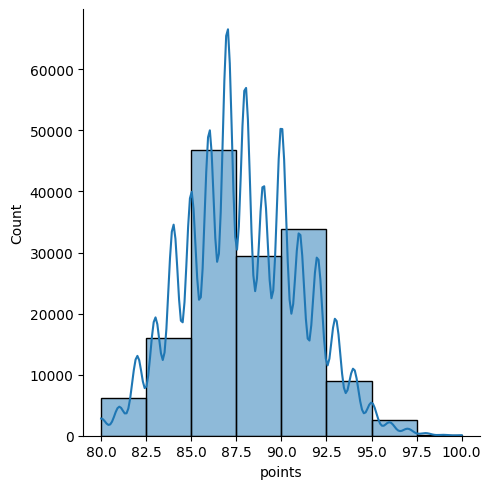

In [41]:
ax = sns.displot(df2["points"],bins=8,kde=True)

In [54]:
df2.variety.value_counts().head(5).index
df2.variety.isin(df2.variety.value_counts().head(5).index)
df2[df2.variety.isin(df2.variety.value_counts().head(5).index)]

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,94
8,US,Silice,95.0,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,83
9,US,Gap's Crown Vineyard,95.0,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,83
11,US,Estate Vineyard Wadensvil Block,95.0,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,88
...,...,...,...,...,...,...,...,...,...,...
144017,France,Les Beaux-Monts,92.0,52.0,Burgundy,Vosne-Romanée,NaN,Pinot Noir,Daniel Rion,98
144018,France,Aux Brulees,90.0,65.0,Burgundy,Vosne-Romanée,NaN,Pinot Noir,Michel Gros,84
144019,France,NaN,89.0,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros,85
144020,France,Les Chaliots,87.0,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros,85


<Axes: xlabel='variety', ylabel='points'>

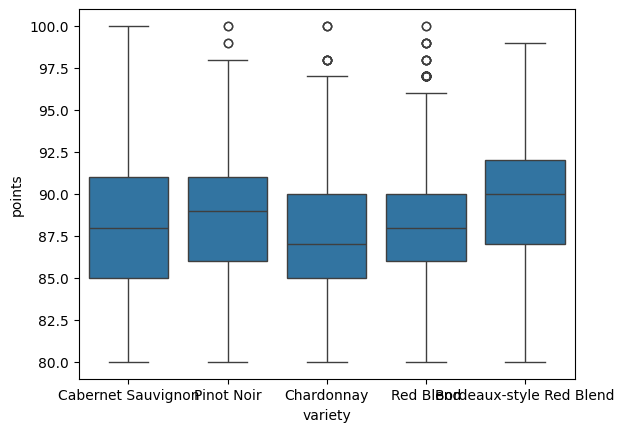

In [47]:
df20= df2[df2.variety.isin(df2.variety.value_counts().head(5).index)]
plt.Figure(figsize=(12,8))
sns.boxplot(x="variety",y="points",data=df20)

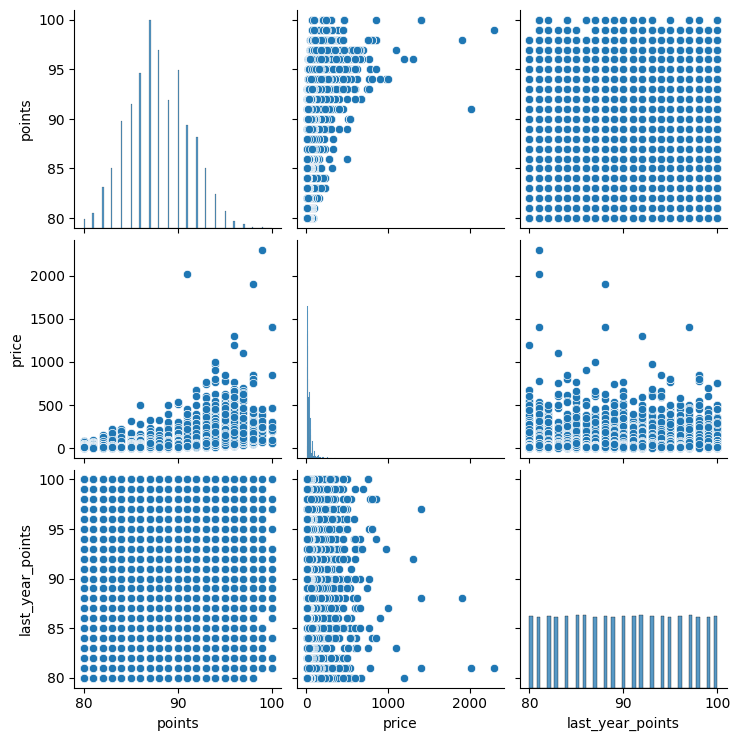

In [55]:
sns.pairplot(df2)

# Visualizacion con DF1

In [56]:
df1.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


<Axes: xlabel='Species', ylabel='PetalLengthCm'>

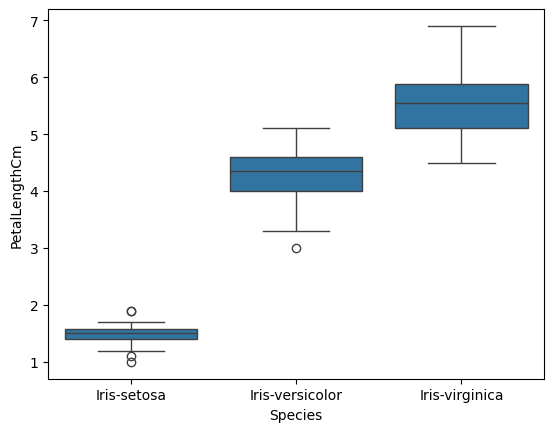

In [60]:
sns.boxplot(x="Species",y="PetalLengthCm",data=df1)

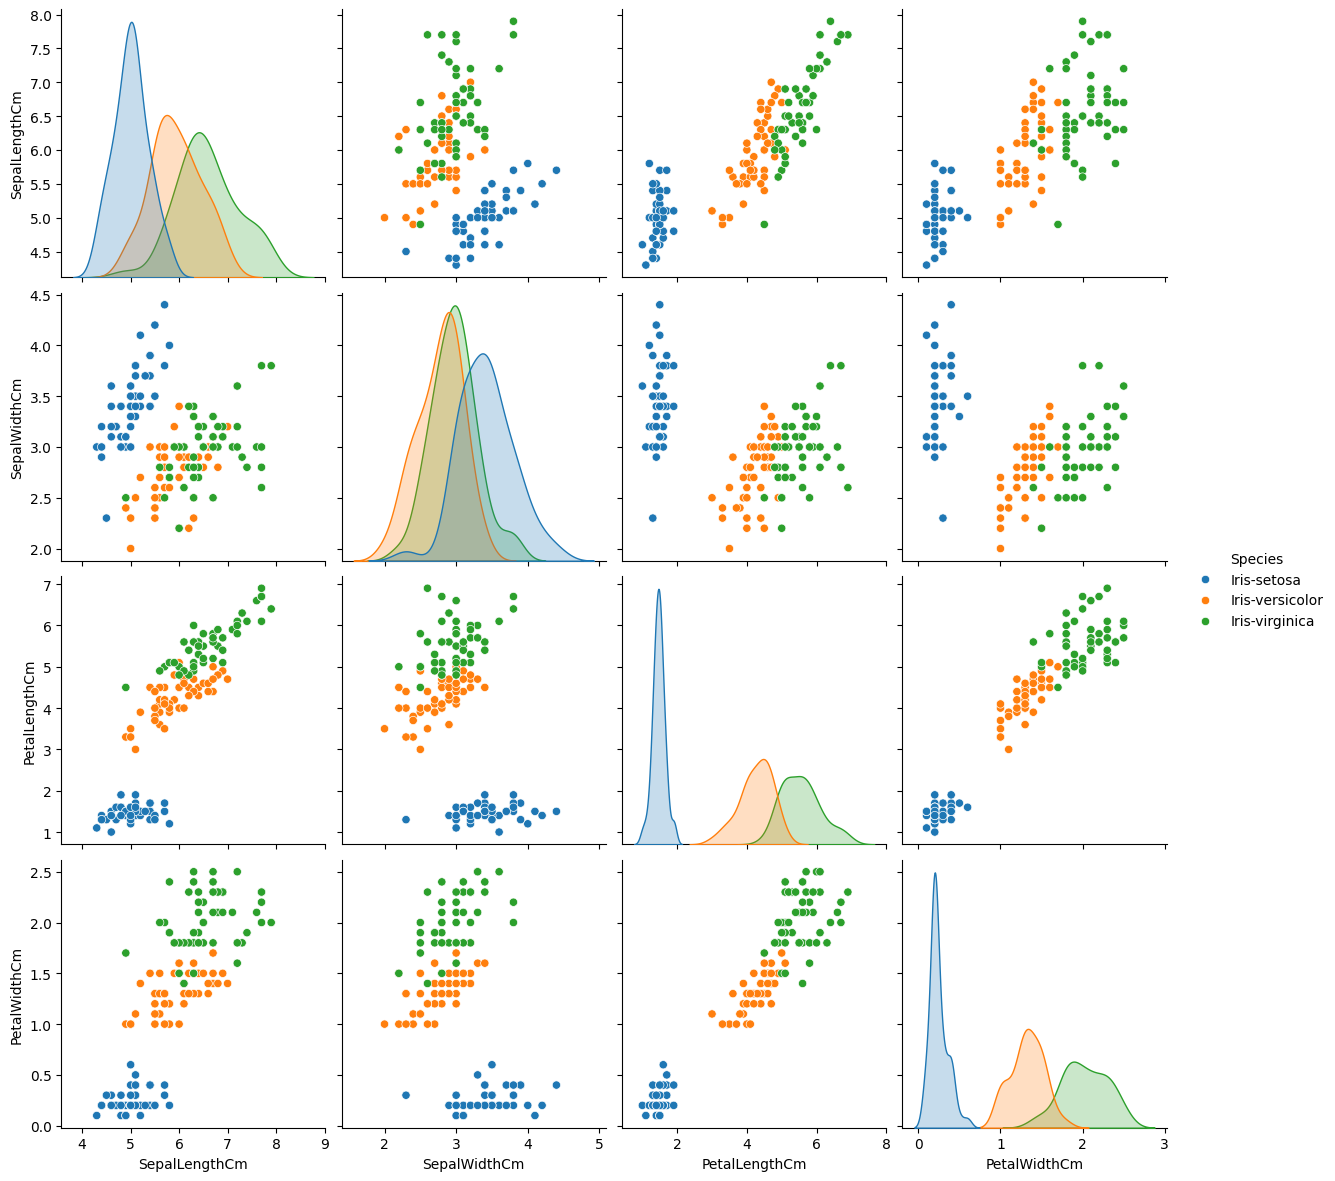

In [62]:
sns.pairplot(df1.drop("Id",axis=1),hue="Species",size=3)

In [64]:
#"oscardavidperilla/domestic-violence-in-colombia"
df3 = pd.DataFrame()
dataset = datagen.download_dataset_zip("oscardavidperilla/domestic-violence-in-colombia") 
csv_dir =datagen.extract_zip_files(dataset)
df3 = datagen.create_csv(csv_dir)

Descargando dataset desde Kaggle...


100%|██████████| 3.02M/3.02M [00:00<00:00, 50.5MB/s]

Extracting files...
Ruta al dataset: /home/codespace/.cache/kagglehub/datasets/oscardavidperilla/domestic-violence-in-colombia/versions/1
No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.
Leyendo /home/codespace/.cache/kagglehub/datasets/oscardavidperilla/domestic-violence-in-colombia/versions/1/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv...


Creando/actualizando 
cvs creado correctamente en 


In [65]:
df3.head(2)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÃNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÃ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [66]:
df3["GENERO"].value_counts()

GENERO
FEMENINO      366907
MASCULINO     109759
NO REPORTA       294
-                  7
Name: count, dtype: int64